In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
file_path = r"datasets\train.csv"

# Load DataFrame from CSV file
df = pd.read_csv(file_path)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.shape

(614, 13)

In [6]:
df.info

<bound method DataFrame.info of       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5849          

In [7]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
df.describe()   #by default Intger value

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [9]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [11]:
#handling the numerical missing data
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [12]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [13]:
#handling the categorical missing data
df['Gender'].mode()[0]

'Male'

In [14]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [15]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#Exloratory Data Analysis

In [16]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


<Axes: xlabel='count', ylabel='Gender'>

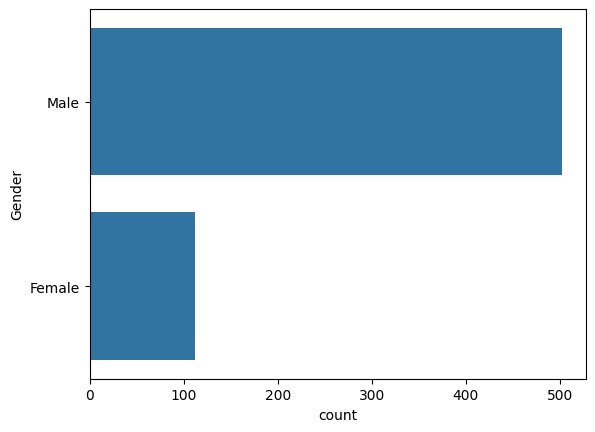

In [17]:
#Categorical Data
import seaborn as sns
sns.countplot(df['Gender'])

<Axes: ylabel='count'>

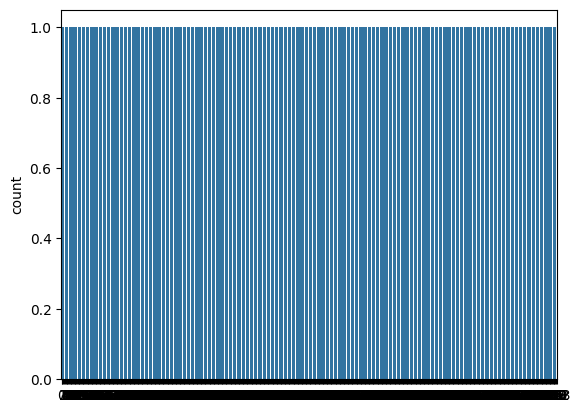

In [18]:
sns.countplot(df.LoanAmount)

<Axes: xlabel='count', ylabel='Married'>

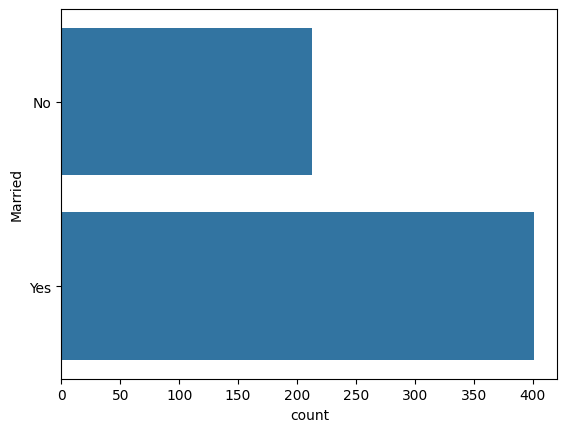

In [19]:
sns.countplot(df.Married)

<Axes: ylabel='count'>

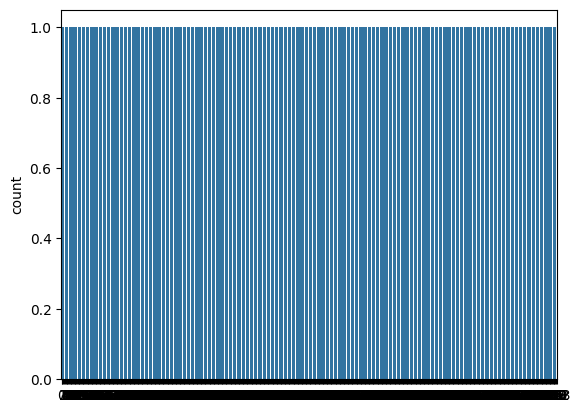

In [20]:

sns.countplot(df.Loan_Amount_Term)

<Axes: ylabel='count'>

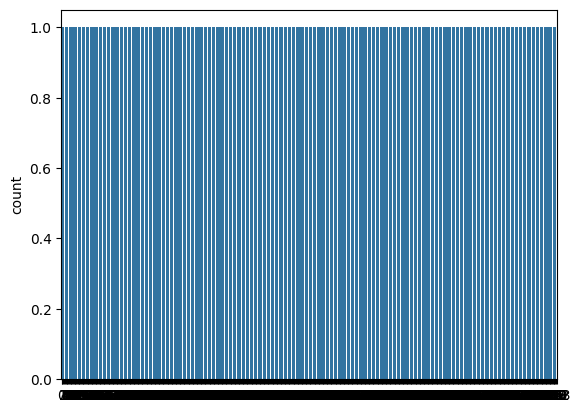

In [21]:
sns.countplot(df.Credit_History)

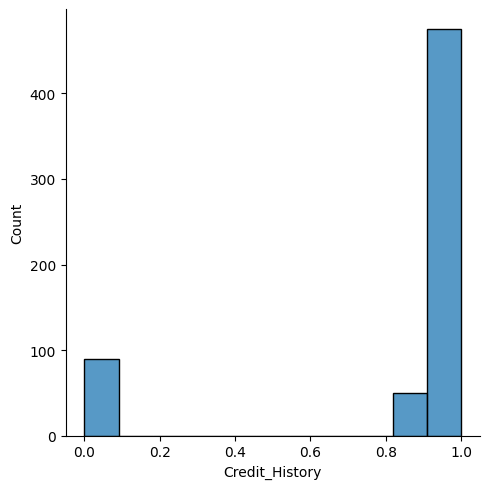

In [22]:
#Numerical data
sns.displot(df.Credit_History)

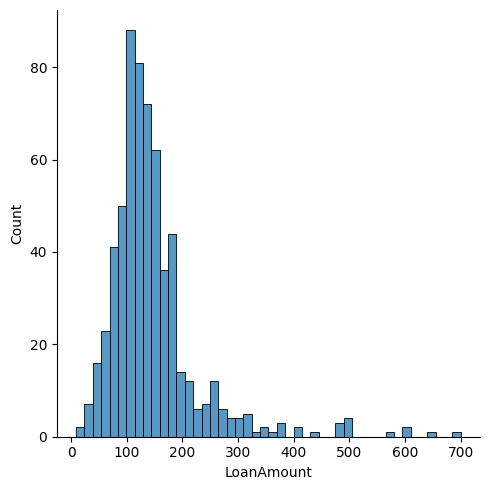

In [23]:
sns.displot(df.LoanAmount)

In [24]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [25]:
#Creating anew Column 
df['Total Income']=df['ApplicantIncome']+df['CoapplicantIncome']

In [26]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0


In [27]:
#Data Transformation
df['ApplicantIncomeLog'] = np.log(df['ApplicantIncome'])

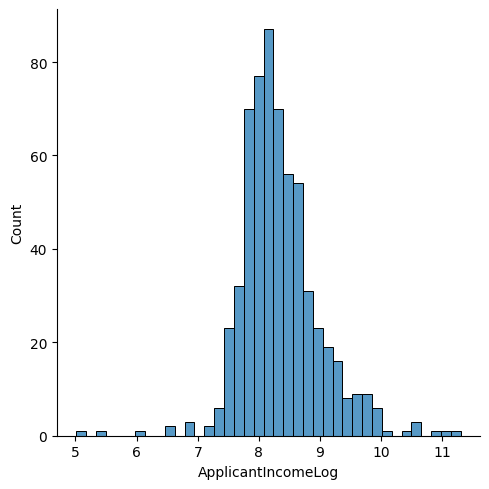

In [28]:
sns.displot(df.ApplicantIncomeLog)

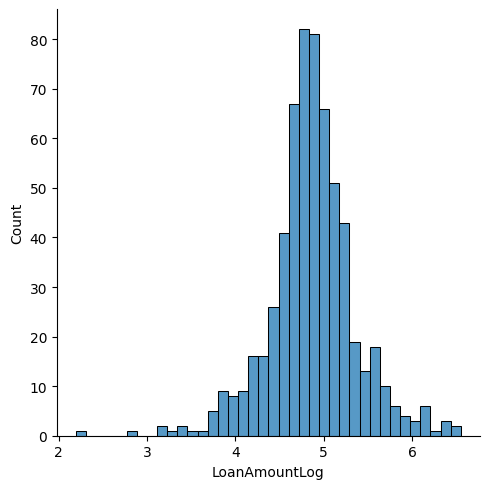

In [29]:
df['LoanAmountLog'] = np.log(df['LoanAmount'])
sns.displot(df.LoanAmountLog)

In [30]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total Income,ApplicantIncomeLog,LoanAmountLog
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674026,4.986426
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430109,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.856707,4.787492
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699515,4.948760


In [31]:
print(df.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total Income', 'ApplicantIncomeLog', 'LoanAmountLog'],
      dtype='object')


In [32]:
# Adjust colu list to remove columns not present in the DataFrame
colu = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term']

# Drop columns
df = df.drop(columns=colu)

# Verify the DataFrame after dropping columns
print(df.head())


    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   Credit_History Property_Area Loan_Status  Total Income  ApplicantIncomeLog  \
0             1.0         Urban           Y        5849.0            8.674026   
1             1.0         Rural           N        6091.0            8.430109   
2             1.0         Urban           Y        3000.0            8.006368   
3             1.0         Urban           Y        4941.0            7.856707   
4             1.0         Urban           Y        6000.0            8.699515   

   LoanAmountLog  
0       4.986426  
1       4.852030  
2       4.189655  
3       4.787492  
4  

In [33]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,Total Income,ApplicantIncomeLog,LoanAmountLog
0,LP001002,Male,No,0,Graduate,No,1.0,Urban,Y,5849.0,8.674026,4.986426
1,LP001003,Male,Yes,1,Graduate,No,1.0,Rural,N,6091.0,8.430109,4.852030
2,LP001005,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,3000.0,8.006368,4.189655
3,LP001006,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,4941.0,7.856707,4.787492
4,LP001008,Male,No,0,Graduate,No,1.0,Urban,Y,6000.0,8.699515,4.948760


In [34]:
df.Gender.value_counts()

Gender
Male      502
Female    112
Name: count, dtype: int64

In [35]:
df.Education.value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

#Handling Catergorical data 

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loan_ID             614 non-null    object 
 1   Gender              614 non-null    object 
 2   Married             614 non-null    object 
 3   Dependents          614 non-null    object 
 4   Education           614 non-null    object 
 5   Self_Employed       614 non-null    object 
 6   Credit_History      614 non-null    float64
 7   Property_Area       614 non-null    object 
 8   Loan_Status         614 non-null    object 
 9   Total Income        614 non-null    float64
 10  ApplicantIncomeLog  614 non-null    float64
 11  LoanAmountLog       614 non-null    float64
dtypes: float64(4), object(8)
memory usage: 57.7+ KB


In [37]:
ts=pd.read_csv("test.csv")
ts.head()
#Filling the numerical missing data
ts['LoanAmount']=ts['LoanAmount'].fillna(ts['LoanAmount'].mean())
ts['Loan_Amount_Term']=ts['Loan_Amount_Term'].fillna(ts['Loan_Amount_Term'].mean())
ts['Credit_History']=ts['Credit_History'].fillna(ts['Credit_History'].mean())
#handling the categorical missing data
ts['Gender']=ts['Gender'].fillna(ts['Gender'].mode()[0])
ts['Married']=ts['Married'].fillna(ts['Married'].mode()[0])
ts['Dependents']=ts['Dependents'].fillna(ts['Dependents'].mode()[0])
ts['Self_Employed']=ts['Self_Employed'].fillna(ts['Self_Employed'].mode()[0])

#Creating anew Column 
ts['Total Income']=ts['ApplicantIncome']+ts['CoapplicantIncome']

#Data Transformation
ts['ApplicantIncomeLog'] = np.log(ts['ApplicantIncome'])
ts['LoanAmountLog'] = np.log(ts['LoanAmount'])

colu=['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Total Income']
ts = ts.drop(columns=colu,axis=1)


FileNotFoundError: [Errno 2] No such file or directory: 'test.csv'

#Train Test Split

In [ ]:
#Specify the input and Otuput attributes
x=df.drop(columns=['Loan_Status'],axis=1)
y=df['Loan_Status']

In [ ]:
x

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
0,LP001002,Male,No,0,Graduate,No,1.0,Urban
1,LP001003,Male,Yes,1,Graduate,No,1.0,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,1.0,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,1.0,Urban
4,LP001008,Male,No,0,Graduate,No,1.0,Urban
...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,1.0,Rural
610,LP002979,Male,Yes,3+,Graduate,No,1.0,Rural
611,LP002983,Male,Yes,1,Graduate,No,1.0,Urban
612,LP002984,Male,Yes,2,Graduate,No,1.0,Urban


In [ ]:
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [ ]:
pip install scikit-learn


     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.6 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.6 kB 325.1 kB/s eta 0:00:01
     -------------------------------------- 60.6/60.6 kB 535.5 kB/s eta 0:00:00
   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.6 MB 2.4 MB/s eta 0:00:05
    --------------------------------------- 0.1/10.6 MB 2.9 MB/s eta 0:00:04
   - -------------------------------------- 0.3/10.6 MB 2.2 MB/s eta 0:00:05
   - -------------------------------------- 0.4/10.6 MB 2.3 MB/s eta 0:00:05
   - -------------------------------------- 0.4/10.6 MB 2.3 MB/s eta 0:00:05
   -- ------------------------------------- 0.6/10.6 MB 2.2 MB/s eta 0:00:05
   -- ------------------------------------- 0.7/10.6 MB 2.5 MB/s eta 0:00:04
   --- ------------------------------------ 0.9/10.6 MB 2.4 MB/s eta 0:00:05
   --- -


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split( x , y , test_size=0.25, random_state=42)

In [ ]:
x_train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area
92,LP001319,Male,Yes,2,Not Graduate,No,1.0,Urban
304,LP001978,Male,No,0,Graduate,No,1.0,Rural
68,LP001238,Male,Yes,3+,Not Graduate,Yes,1.0,Urban
15,LP001032,Male,No,0,Graduate,No,1.0,Urban
211,LP001711,Male,Yes,3+,Graduate,No,0.0,Semiurban


In [ ]:
y_test.head()

350    Y
377    Y
163    Y
609    Y
132    Y
Name: Loan_Status, dtype: object

# model training

In [ ]:
print(x_train.columns)

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Credit_History', 'Property_Area'],
      dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Assuming x_train and x_test are your feature matrices, and y_train, y_test are your target variables.

# Step 1: Define preprocessing steps
# For categorical features, we'll use one-hot encoding.
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Credit_History', 'Property_Area']

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features)
    ])

# Step 2: Define the model
model = RandomForestClassifier()

# Step 3: Create a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Step 4: Fit the pipeline on the training data
pipeline.fit(x_train, y_train)

# Step 5: Evaluate the model
accuracy = pipeline.score(x_test, y_test)
print("Accuracy is", accuracy * 100)


Accuracy is 71.42857142857143


# confusion matrics

In [ ]:
# logistic regression
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Sample DataFrame (replace with your actual DataFrame)
data = {
    'numerical_feature_1': [1, 2, 3],
    'numerical_feature_2': [4, 5, 6],
    'categorical_feature_1': ['A', 'B', 'A'],
    'categorical_feature_2': ['X', 'Y', 'Z'],
    'loan_status': [0, 1, 0]  # Example target variable
}

df = pd.DataFrame(data)

# Separate features and target variable
X = df.drop(columns=['loan_status'])  # Replace 'loan_status' with your actual target column name
y = df['loan_status']

# Identify categorical feature names
categorical_features = ['categorical_feature_1', 'categorical_feature_2']

# Define the ColumnTransformer with handle_unknown='ignore'
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ],
    remainder='passthrough'
)

# Split data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit and transform the preprocessor on training data
x_train_processed = preprocessor.fit_transform(x_train)

# Transform the preprocessor on testing data
x_test_processed = preprocessor.transform(x_test)

# Now you can train your logistic regression model using the processed data
model3 = LogisticRegression()
model3.fit(x_train_processed, y_train)

# Evaluate model accuracy
print("Accuracy is", model3.score(x_test_processed, y_test) * 100)




Accuracy is 0.0


In [ ]:
# model save
import pickle
file=open("model.pkl", 'wb')
pickle.dump(model, file)